<a href="https://colab.research.google.com/github/Vincent112704/movie_recommender/blob/main/recommenderSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2025-01-17 08:17:59--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  --.-KB/s    in 0.08s   

2025-01-17 08:17:59 (67.6 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import json
import numpy as np

In [4]:
df = pd.read_csv('/content/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
x = df.iloc[0]
x


,0
budget,237000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/
id,19995
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
original_language,en
original_title,Avatar
overview,"In the 22nd century, a paraplegic Marine is di..."
popularity,150.437577
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289..."


In [6]:
x['genres']
genres1 = json.loads(x['genres'])
print(type(genres1))
print(genres1)

<class 'list'>
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]


In [7]:
#Get a small sample size to test if your logic works
genres1 = json.loads(x['genres'])
y = []
for i in genres1:
  x = ''.join(i['name'].split())
  y.append(x)
y

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [8]:
def genres_and_keywords_to_string(rows_of_genres_and_keywords): #create a function to store the logic in the cell above

    #load them into json so that you can use them
    genres = json.loads(rows_of_genres_and_keywords['genres'])
    keywords = json.loads(rows_of_genres_and_keywords['keywords'])
    #convert them into a single line of string for every movie in the database
    y = []
    z = []
    for i in genres: #Loops through the genre row to get the value of key name and collects them in a y list
      x = ''.join(i['name'].split())
      y.append(x)

    for i in keywords: #Loops through the genre row to get the value of key name and collects them in a z list
      x = ''.join(i['name'].split())
      z.append(x)

    return "%s %s" % (' '.join(y), ' '.join(z))




In [9]:
#check if the column is successfully created
df['string_rep'] = df.apply(genres_and_keywords_to_string, axis=1)
df['string_rep'].iloc[0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [10]:
tfidf_object = TfidfVectorizer(max_features=2000)
tfidf_matrix = tfidf_object.fit_transform(df['string_rep'])#creates a tfidf matrix on the string column
tfidf_matrix

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [11]:
#map each string_representation to their index
movie_index = pd.Series(df.index, index=df['title'])
movie_index

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [51]:
indexMovie = movie_index['Avatar']
query = tfidf_matrix[indexMovie]

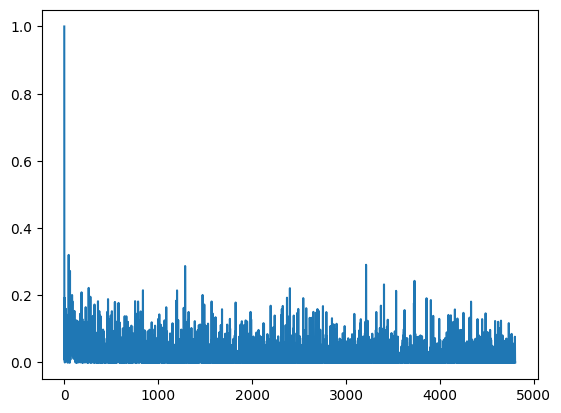

In [52]:
score = cosine_similarity(query, tfidf_matrix)
score = score.flatten() #turns the 1 x N array into 1 dimensional
plt.plot(score)

In [53]:
recommended_index = np.argsort(score)[::-1] #sort it in descending order
#convert the indices back to the movie title
df['title'].iloc[recommended_index[1:6]]

,title
47,Star Trek Into Darkness
3214,Barbarella
1287,A Monster in Paris
61,Jupiter Ascending
3730,Cargo


In [56]:
#put it in a function that accepts the title as a paramter
def recommender(title):
  #get the index of the movie
  title_index = movie_index[title]
  #create a sparse matrix representation of the row of that index
  query_title_matrix = tfidf_matrix[title_index]
  #get the cosine similarity score
  score_title = cosine_similarity(query_title_matrix, tfidf_matrix)
  #flatten the score into a 1 D array
  score_title = score_title.flatten()
  #sort the score in descending order and return the top 5
  recommended_title = np.argsort(score_title)[::-1]
  return df['title'].iloc[recommended_title[1:6]]

In [58]:
print("Recommendations for Avatar" )
print(recommender('Avatar'))

Recommendations for Avatar
47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object


In [60]:
print("Recommendations for Newlyweds" )
print(recommender('Newlyweds'))

Recommendations for Newlyweds
1862                    Beauty Shop
4188          Dysfunctional Friends
3176         Breakin' All the Rules
1934                Say It Isn't So
4763    Smiling Fish & Goat On Fire
Name: title, dtype: object
